1. if there is more then 1 unique value then use odinal encoding
2. if there is more then 2 unique value then use  onehotencoding

1. Scaling make the every columns important
    - MinMax Scaling
    - Standard Scaling

1. Columns Transformer
    - make_columns_selector()
    - make_columns_transformer()

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
import missingno as mos

In [2]:
X,y = fetch_openml('titanic',version=1, as_frame=True,return_X_y=True)

C:\Users\saroj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


<AxesSubplot: >

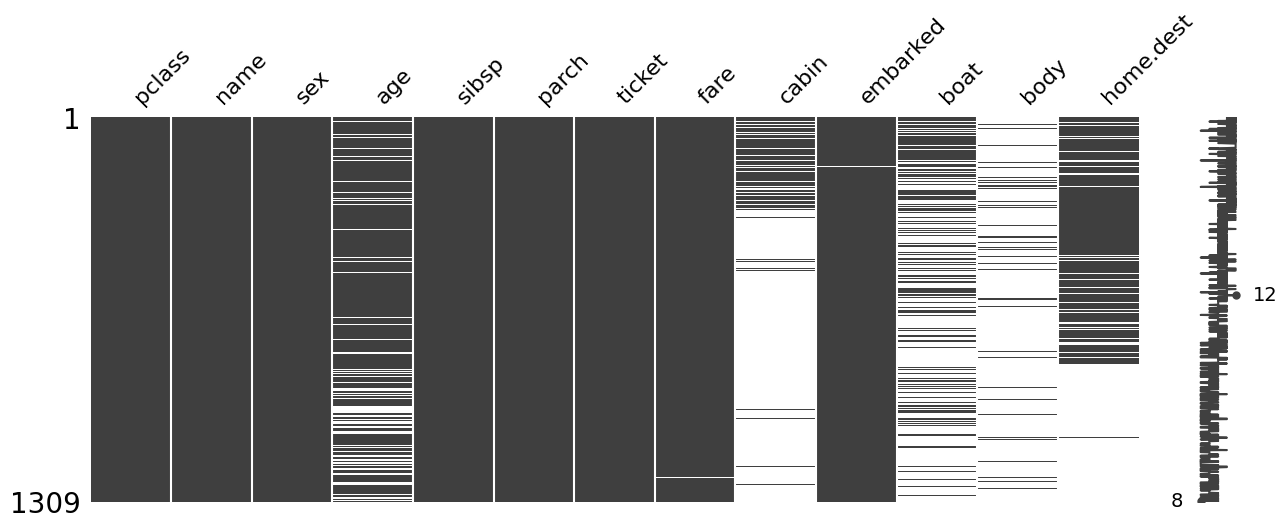

In [3]:
mos.matrix(X,figsize=(15,5))

In [4]:
print('column name=>',X.columns.tolist())

column name=> ['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest']


In [5]:
X.shape

(1309, 13)

In [6]:
num_col=['age','fare']
cat_col=['embarked','sex','pclass']

#num_col -. imputer -. scaler -. processed output
num_transformer = Pipeline(steps=[('imputer',SimpleImputer()),
('scaler',MinMaxScaler())])


cat__transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
('hot_encoder',OneHotEncoder(drop='first',handle_unknown='ignore'))])

In [7]:
preprocessor= ColumnTransformer(transformers=[('numarical',num_transformer,num_col),
('categorical',cat__transformer,cat_col)])

In [8]:
preprocessor.fit_transform(X)

array([[0.36116884, 0.41250333, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00939458, 0.2958059 , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.0229641 , 0.2958059 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.32985358, 0.01410226, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.33611663, 0.01410226, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.36116884, 0.01537098, 0.        , ..., 1.        , 0.        ,
        1.        ]])

In [9]:
df=pd.read_csv('C:/Users/saroj/Documents/machine lerning/Mall_Customers.csv')

In [10]:
X = df.drop(columns='Spending Score (1-100)')
y = df['Spending Score (1-100)']

In [11]:
X

,CustomerID,Genre,Age,Annual Income (k$)
0,1,Male,19,15
1,2,Male,21,15
2,3,Female,20,16
3,4,Female,23,16
4,5,Female,31,17
...,...,...,...,...
195,196,Female,35,120
196,197,Female,45,126
197,198,Male,32,126
198,199,Male,32,137
